<a href="https://colab.research.google.com/github/davidkant/mai/blob/master/tutorial/4_1_Probability_and_DJEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.1 Probability in Python and DJEN
We've seen rule-based systems and parametric models do some pretty powerful stuff, but wouldn't it be great if we didn't have to figure out all of those complicated rules and parameters? There's a common archetype in music AI called *analysis/re-synthesis*. The idea is to derive enough information from a group of pieces to generate a new work that fits the group. The goal might be to emulate the style of an artist, capture the characeristics of a genre, or just make some pretty strange music. Often the results of these sytems (especially the results that don't quite come out right) tell use a lot about the music we are trying to emulate. Tutorial 4 focusses on *analysi/re-synthesis* using Markov models, and the fundamental math concept behind it all is ***probability***. This notebook introduces some preliminary techniques for working with probability and distributions in Python.

## Setup


In [0]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [0]:
# imports
import mai
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Probability Distributions

One way work with probability distributions in Python is to choose numbers randomly from a list of elements. Think of the list as the bag of red or blue balls we talked about in class.

In [0]:
# define a list of elements
bag = ['red', 'blue', 'blue', 'blue']

# choose randomly from it
random.choice(bag)

'blue'

Repeating an element multiple times in the list increases that element's probability — each element's probability is proportional to the number of times it appears in the list.

In [0]:
# define a list of elements
bag = ['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

# choose randomly from it
random.choice(bag)

'blue'

But writing out everything can get pretty tedious. Luckily, there's a shortcut, using `random.choices()`. The first argument (to the left of the comma) is the list to choose from, and the second argument is the probability distribution.

In [0]:
# elements in the list
bag = ['red', 'blue']

# probabilities for each elemnt
distribution = [0.25, 0.75]

# choose according to probabilities
random.choices(bag, distribution)

['blue']

Remember, **probability distributions must must must sum to 1.0**, which can be kind of a pain when quickly adjusting values. However, `random.choices()` makes life a little easier for us by relaxing this constraint. Our likelihoods do not have to sum to 1. Technically, this is not a distribution, but rather something called *weights*. Weights are like a probabilty distribution in the sense that they indicate the likelihood that a given note is chosen, however, unlike probabilities in a distribution, weights do not have to sum to 1

In [0]:
# elements in the list
bag = ['red', 'blue']

# probabilities for each elemnt
weights = [1, 3]

# choose according to probabilities
random.choices(bag, weights)

['red']

## Histograms
A histogram is used to visualize the result of a probabilistic process. Let's plot a histogram of a simple sequence of numbers `[0,1,2,3,4,5,6,7,8,9]`. Try duplicating or removing numbers — what do you see?

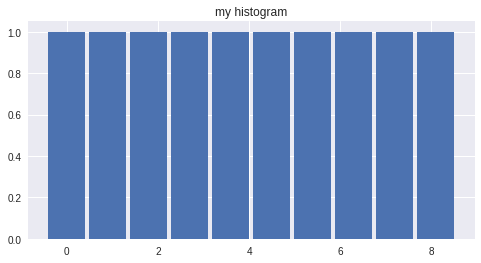

In [0]:
# sequence to plot a histogram of
my_music = [0,1,2,3,4,5,6,7,8,9]

# plot the histogram
plt.figure(figsize=(8,4)) 
plt.hist(my_music, range=(0,9), align='left', rwidth=0.9)
plt.title("my histogram")
plt.show()

Now let's plot a histogram of a sequence of numbers chosen randomly from a given list. `random.choices` returns an entire list of random choices if you assign the argument `k=` a value greater than `1`.

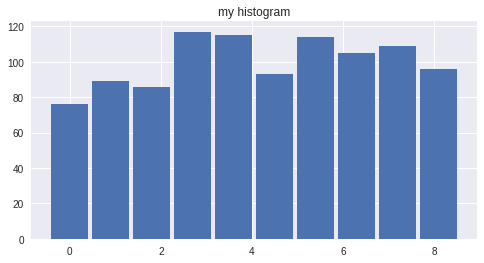

In [0]:
# list of numbers to choose from
bag = [0,1,2,3,4,5,6,7,8,9]

# choose 1000 random elements from the list
my_music = random.choices(bag, k=1000)
  
# plot histogram
plt.figure(figsize=(8,4))
plt.hist(my_music, range=(0,9), align='left', rwidth=0.9)
plt.title("my histogram")
plt.show()

Does the above distirbution look right? Remember, the law or large numbers says that in the short term our **observed** distrubiton may not exactly match the underlying **actual** distribution we choose from. To illustrate, instead of choosing 1000 at once, let's choose one at a time and see how the probability distribution changes.

In [0]:
# list of numbers to choose from
my_bag = [0,1,2,3,4,5,6,7,8,9]

# initialize new list to empty
my_music = []

Execute the following cell over and over again. What do you see?

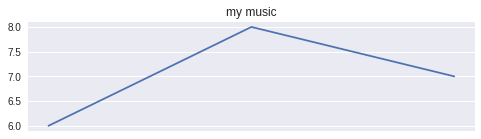

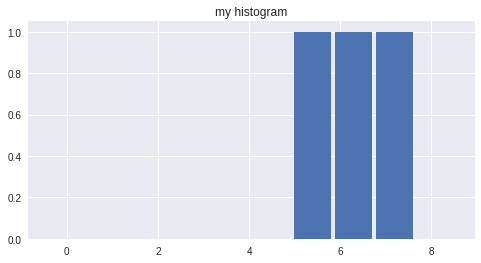

In [0]:
# make one choice
my_music += [random.choice(my_bag)]

# plot music as time series
plt.figure(figsize=(8,2))
plt.plot(my_music)
plt.xticks([])
plt.title("my music")

# plot histogram
plt.figure(figsize=(8,4))
plt.hist(my_music, range=(0,9), align='left', rwidth=0.9)
plt.title("my histogram")
plt.show()

## Now let's try music
Let's use probability distributions to generate music. Create a list of possible notes and a corresponding list of weights for each note.

In [0]:
# pitches to choose from
pitches = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]

# pitch weights
p_weights = [1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1]

As well as a list of possible durations and list of duration weights.

In [0]:
# durations to choose from
durs = [1/4*0.5, 2/4*0.5, 1*0.5]

# duration weights
d_weights = [1, 9, 1]

Now generate some music. Note that we don't need to use a `while` loop to make choice after choice  because `random.choices()` returns an entire list of choices. Pretty convenient.

In [0]:
# number of notes
num_notes = 22

# choose pitches 
my_pitches = random.choices(pitches, p_weights, k=num_notes)

# choose durations
my_durs = random.choices(durs, d_weights, k=num_notes)

Plot histograms.

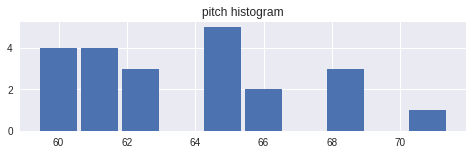

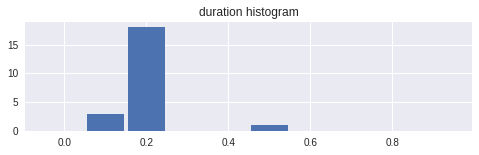

In [0]:
# pitch histogram
plt.figure(figsize=(8,2))
plt.hist(my_pitches, range=(60,72), align='left', rwidth=0.9)
plt.title("pitch histogram")
plt.show()

# duration histogram
plt.figure(figsize=(8,2))
plt.hist(my_durs, range=(0,1), align='left', rwidth=0.9)
plt.title("duration histogram")
plt.show()

And (finally) listen.

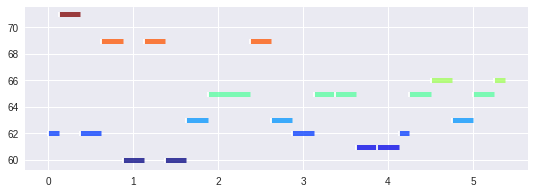

In [0]:
# let's see it
mai.make_music_plot(my_pitches, durs=my_durs)

# program 31 is electric guitar
mai.make_music(my_pitches, durs=my_durs, pgm=31, is_drum=False)

## All in one place
This cell combines everything into one place, where you can adjust the pitches, durations, and weights to produce a melody without having to skip around the notebook. The example above sounds pretty much random, but we can carve something out this randomness by increasing weight values for notes we'd like to hear more of.

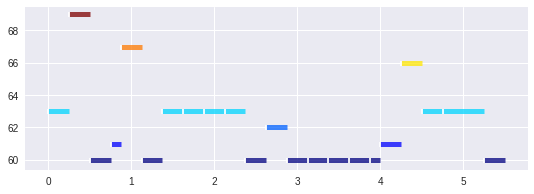

In [0]:
# pitches, durs, and weights
pitches = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]
p_weights = [30, 6, 2, 40, 1, 1, 1, 1, 1, 2, 3, 1]
durs = [1/4*0.5, 2/4*0.5, 1*0.5]
d_weights = [1, 9, 1]
num_notes = 22

# choose pitches 
my_pitches = random.choices(pitches, p_weights, k=num_notes)

# choose durations
my_durs = random.choices(durs, d_weights, k=num_notes)

# let's see it
mai.make_music_plot(my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=31, is_drum=False)

## Let's Djent
The neat thing about [DJEN generator](https://djen.co/) is it has probabilities for popular artists. Basically, this is a description, albeit in probabilistic terms, of that artist's style. Here's something like their Meshuggah. Note that I'm using a restricted set of notes.

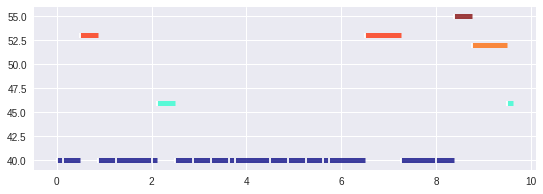

In [0]:
# pitches, durs, and weights
pitches = [40, 52, 53, 55, 46]
p_weights = [66, 8, 8, 8, 4]
durs = [1.5*1*0.5, 1.5*1/2*0.5, 1/4*0.5]
d_weights = [2, 6, 2]

num_notes = 23

# choose pitches 
my_pitches = random.choices(pitches, p_weights, k=num_notes)

# choose durations
my_durs = random.choices(durs, d_weights, k=num_notes)

# let's see it
mai.make_music_plot(my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=31, is_drum=False)

The other neat thing about DJEN is loops.

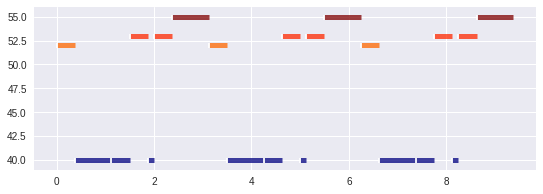

In [0]:
# pitches, durs, and weights
pitches = [40, 52, 53, 55, 46]
p_weights = [66, 8, 8, 8, 4]
durs = [1.5*1*0.5, 1.5*1/2*0.5, 1/4*0.5]
d_weights = [2, 6, 2]

num_notes = 7

# choose pitches 
my_pitches = random.choices(pitches, p_weights, k=num_notes)

# choose durations
my_durs = random.choices(durs, d_weights, k=num_notes)

# loop it three times
my_pitches = my_pitches * 3
my_durs = my_durs * 3

# let's see it
mai.make_music_plot(my_pitches, durs=my_durs)

# let's hear it
mai.make_music(my_pitches, durs=my_durs, pgm=31, is_drum=False)

And drums. (Don't worry about the code in this cell.)

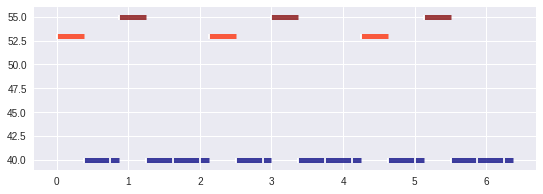

In [0]:
# pitches, durs, and weights
pitches = [40, 52, 53, 55, 46]
p_weights = [66, 8, 8, 8, 4]
durs = [1.5*1*0.5, 1.5*1/2*0.5, 1/4*0.5]
d_weights = [2, 6, 2]

num_notes = 7

# choose pitches 
my_pitches = random.choices(pitches, p_weights, k=num_notes)

# choose durations
my_durs = random.choices(durs, d_weights, k=num_notes)

# loop it three times
my_pitches = my_pitches * 3
my_durs = my_durs * 3

# let's see it
mai.make_music_plot(my_pitches, durs=my_durs)

# let's hear it
mai.make_music_heterophonic([my_pitches, my_pitches], durs=[my_durs, my_durs], pgm=31, is_drum=[False, True])